## EE 102: VM RC Circuits
## A Virtual Manipulator (VM) for RC Circuits and Convolutions

This notebook demonstrates code implementations for the RC circuit outputs discussed in **week5_lecture1.pdf**. Each section provides a solved example for a different input signal, visualizing the response of the RC circuit using Python and matplotlib.

In the lecture notes, we discussed the following:

- **Impulse Input**: Simulating the circuit's response to an impulse.
- **Step Input**: Computing and plotting the output for a step input signal.
- **Sine Input**: Analyzing the output when the input is a sinusoidal signal.
- **General Complex Input**: Demonstrating the response for a general complex exponential input.
- **Special Cases of Complex Input**: Exploring particular cases such as DC and pure sinusoidal inputs as special cases of the general complex exponential.


### An impulse input to the RC circuit

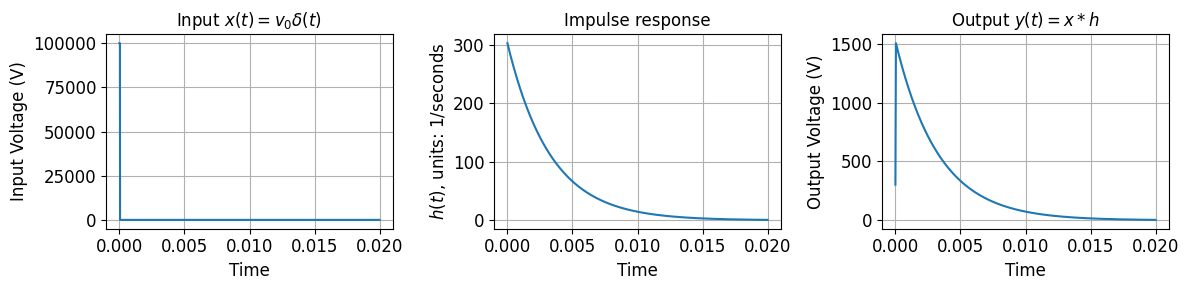

In [18]:
import numpy as np, matplotlib.pyplot as plt

R, C = 3300, 1e-6
RC = R*C
T, dt = 0.02, 1e-5 # total time, and time interval for simulation
t = np.arange(0, T, dt)
v0, eps = 5.0, 5e-5  # impulse area v0, width epsilon (to approximate the impulse)

# Signals
h = (1/RC)*np.exp(-t/RC)
# Create rectangular pulse approximating impulse: width eps, height 1/eps, area v0
pulse_condition = (t >= 0) & (t < eps)  # time window where pulse exists
pulse_height = 1/eps                    # height to achieve area v0
x = pulse_height * pulse_condition * v0 # rectangle of area v0 (approximating the impulse)
y = dt*np.convolve(x, h, mode='full')[:t.size] # convolution integral approximation, sliced to the max time points that we have


fig, axs = plt.subplots(1,3, figsize=(12,3), sharex=True)
axs[0].plot(t, x)
axs[0].set_title("Input $x(t) = v_0 \delta(t)$")
axs[0].set_ylabel("Input Voltage (V)", fontsize=12)
axs[1].plot(t, h)
axs[1].set_title("Impulse response")
axs[1].set_ylabel("$h(t)$, units: 1/seconds", fontsize=12)
axs[2].plot(t, y)
axs[2].set_title("Output $y(t) = x * h$")
axs[2].set_ylabel("Output Voltage (V)", fontsize=12)
for ax in axs: 
    ax.grid(True)
    ax.set_xlabel("Time", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout(); plt.show()


Quick check: The initial value should be $v_0/RC$! 

In [11]:
v0/RC

1515.1515151515152

### What's up with the first value?

Since we are only approximating the impulse, we don't get the exact jump start right at time 0 that we so desire! Instead, the value of $\epsilon$ controls how close you are to the ideal start. To circumvent this, we can implement an ideal discrete-time impulse by setting the value of an array equal to 1 and keeping it at 0 everywhere else. 

See below:

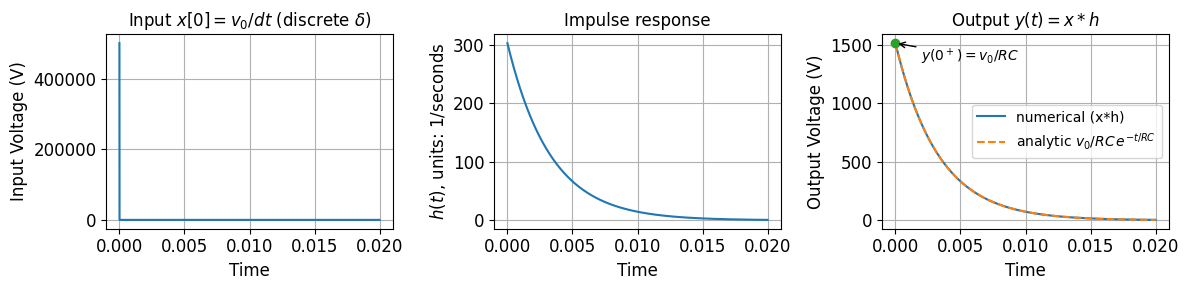

In [19]:
import numpy as np, matplotlib.pyplot as plt

# Parameters
R, C = 3300, 1e-6
RC = R*C
T, dt = 0.02, 1e-5
t = np.arange(0, T, dt)
v0 = 5.0

# Discrete delta: area v0  ->  x[0] = v0/dt
x = np.zeros_like(t)
x[0] = v0/dt

# h(t) = (1/RC) e^{-t/RC} u(t)
h = (1/RC)*np.exp(-t/RC)

# Convolution (discrete integral)
y = dt*np.convolve(x, h, mode='full')[:t.size]
y_true = (v0/RC)*np.exp(-t/RC)

fig, axs = plt.subplots(1,3, figsize=(12,3), sharex=True)
axs[0].plot(t, x); axs[0].set_title(r"Input $x[0]=v_0/dt$ (discrete $\delta$)", fontsize=12)
axs[0].set_ylabel("Input Voltage (V)", fontsize=12)
axs[1].plot(t, h); axs[1].set_title("Impulse response", fontsize=12)
axs[1].set_ylabel(r"$h(t)$, units: 1/seconds", fontsize=12)
axs[2].plot(t, y, label="numerical (x*h)")
axs[2].plot(t, y_true, "--", label=r"analytic $v_0/RC\,e^{-t/RC}$")
axs[2].set_title(r"Output $y(t)=x*h$", fontsize=12)
axs[2].set_ylabel("Output Voltage (V)", fontsize=12)
axs[2].plot([0], [v0/RC], "o"); axs[2].annotate(r"$y(0^+)=v_0/RC$", xy=(0, v0/RC),
                      xytext=(0.002, 0.9*(v0/RC)), arrowprops=dict(arrowstyle="->"))
for ax in axs:
    ax.grid(True); ax.set_xlabel("Time", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
axs[2].legend(fontsize=10)
plt.tight_layout(); plt.show()


### Response to step input

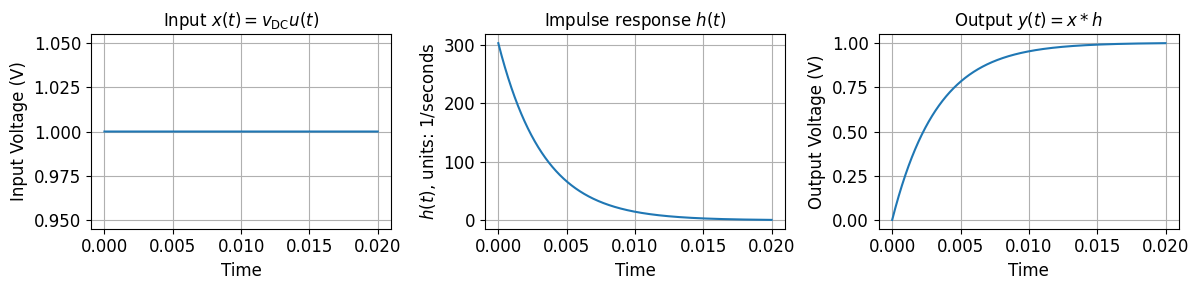

In [22]:
import numpy as np, matplotlib.pyplot as plt

R, C = 3300, 1e-6
RC = R*C
T, dt = 0.02, 1e-5
t = np.arange(0, T, dt)
v_dc = 1.0

h = (1/RC)*np.exp(-t/RC)
x = v_dc*np.ones_like(t)  # step input is simply all ones array!
y = dt*np.convolve(x, h, mode='full')[:t.size]

fig, axs = plt.subplots(1,3, figsize=(12,3), sharex=True)
axs[0].plot(t, x)
axs[0].set_title("Input $x(t)=v_{\\text{DC}} u(t)$")
axs[0].set_ylabel("Input Voltage (V)", fontsize=12)
axs[1].plot(t, h)
axs[1].set_title("Impulse response $h(t)$")
axs[1].set_ylabel("$h(t)$, units: 1/seconds", fontsize=12)
axs[2].plot(t, y)
axs[2].set_title("Output $y(t)=x*h$")
axs[2].set_ylabel("Output Voltage (V)", fontsize=12)
for ax in axs: 
    ax.grid(True)
    ax.set_xlabel("Time", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
    
plt.tight_layout(); plt.show()


### A sine voltage input to the RC circuit

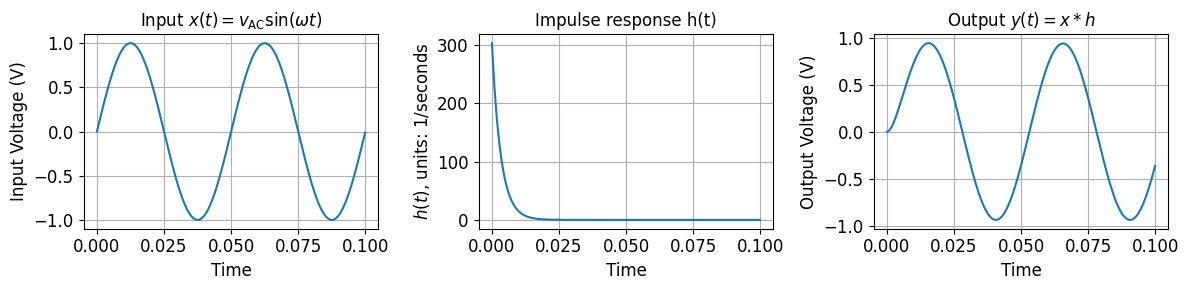

In [35]:
import numpy as np, matplotlib.pyplot as plt

R, C = 3300, 1e-6
RC = R*C
T, dt = 0.1, 1e-4
t = np.arange(0, T, dt)
v_ac, f = 1.0, 20.0
omega = 2*np.pi*f

h = (1/RC)*np.exp(-t/RC)
x = v_ac*np.sin(omega*t)  # u(t) implied since t>=0
y = dt*np.convolve(x, h, mode='full')[:t.size]

fig, axs = plt.subplots(1,3, figsize=(12,3), sharex=True)
axs[0].plot(t, x)
axs[0].set_title("Input $x(t)=v_{\\text{AC}} \sin (\omega t)$")
axs[0].set_ylabel("Input Voltage (V)", fontsize=12)
axs[1].plot(t, h)
axs[1].set_title("Impulse response h(t)")
axs[1].set_ylabel("$h(t)$, units: 1/seconds", fontsize=12)
axs[2].plot(t, y)
axs[2].set_title("Output $y(t)=x*h$")
axs[2].set_ylabel("Output Voltage (V)", fontsize=12)
for ax in axs: 
    ax.grid(True)
    ax.set_xlabel("Time", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout()
plt.show()

### The general complex exponential input: a decaying exponential

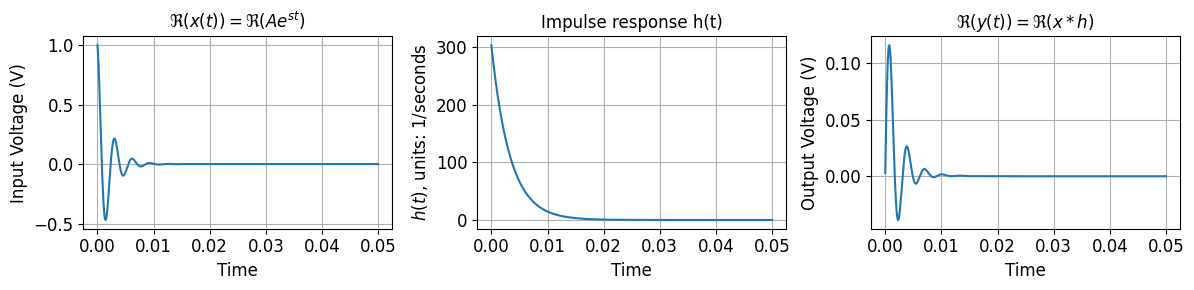

In [39]:
import numpy as np, matplotlib.pyplot as plt

R, C = 3300, 1e-6
RC = R*C
T, dt = 0.05, 1e-5
t = np.arange(0, T, dt)
A = 1.0 + 0.0j
s = -500.0 + 1j*2000.0  # example: decaying complex exponential

h = (1/RC)*np.exp(-t/RC)
x = A*np.exp(s*t) 
# Convolution for complex signals: do it component-wise
y = dt*np.convolve(x, h, mode='full')[:t.size]

fig, axs = plt.subplots(1,3, figsize=(12,3), sharex=True)
axs[0].plot(t, np.real(x))
axs[0].set_title("$\Re({x(t)}) = \Re({A e^{st}})$")
axs[0].set_ylabel("Input Voltage (V)", fontsize=12)
axs[1].plot(t, h)
axs[1].set_title("Impulse response h(t)")
axs[1].set_ylabel("$h(t)$, units: 1/seconds", fontsize=12)
axs[2].plot(t, np.real(y))
axs[2].set_title("$\Re({y(t)}) = \Re({x*h})$")
axs[2].set_ylabel("Output Voltage (V)", fontsize=12)
for ax in axs: 
    ax.grid(True)
    ax.set_xlabel("Time", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
plt.tight_layout()
plt.show()
